# Netflix

In [ ]:
Analizar los datos del contenido para comprender los gustos de los usuarios y recomendar títulos de una forma más precisa.
A partir de los datos históricos, predecir qué títulos podrían llegar a ser los más vistos en el futuro y 
a su vez considerar qué tipo de contenido sería mejor adquirir o producir para publicarlo en la plataforma.

En base a los precios de cada país, predecir cuánto podría llegar a aumentar el revenue y el número de suscriptores, en caso de
que incorporen el plan with ads en todos los países.



In [1]:
#importa numpy
import numpy as np
#importa pandas
import pandas as pd
#Importa las librerias matplotlib, seaborn y Scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
Netflix = pd.read_excel('Netflix.xlsx')


# Análisis Exploratorio de Datos

In [3]:
#Accedemos al tipo de estrutura de datos con el type.
type(Netflix)

pandas.core.frame.DataFrame

In [4]:
# Cuántas filas tiene el dataframe, para eso utilizamos la funcion index.ACLARACIÓN:comenzamos con la primer hoja del archivo excel: Top 10

Netflix_filas = Netflix.shape[0]
print("Número de filas:", Netflix_filas)

Número de filas: 197024


In [5]:
# Nombres de features de la hoja Too 10
Netflix_sheets = list(Netflix.keys())
print("Nombres de las hojas:", Netflix_sheets)

Nombres de las hojas: ['region', 'country_name', 'country_iso2', 'week', 'category', 'weekly_rank', 'show_title', 'season_title', 'cumulative_weeks_in_top_10', 'Genre', 'Realease Year', 'Origin']


In [6]:
#Usamos.rename para renombrar las columnas de Netflix.

Netflix.rename(columns={"Realease Year":"realease_year","Genre":"genre","Origin":"origin"}, inplace=True)

Netflix.columns

Index(['region', 'country_name', 'country_iso2', 'week', 'category',
       'weekly_rank', 'show_title', 'season_title',
       'cumulative_weeks_in_top_10', 'genre', 'realease_year', 'origin'],
      dtype='object')

In [7]:
#.dtypes nos permite saber el tipo de datos que contienen las columnas de Netflix.

Netflix.dtypes

region                        object
country_name                  object
country_iso2                  object
week                          object
category                      object
weekly_rank                    int64
show_title                    object
season_title                  object
cumulative_weeks_in_top_10     int64
genre                         object
realease_year                  int64
origin                        object
dtype: object

In [8]:
#Tranformamos los tipos de datos object por strings. 
#weel es una date, preguntar como pasar al tipo date
Netflix['region'] = Netflix['region'].astype("string")
Netflix['country_name'] = Netflix['country_name'].astype("string")
Netflix['country_iso2'] = Netflix['country_iso2'].astype("string")
Netflix['category'] = Netflix['category'].astype("string")
Netflix['show_title'] = Netflix['show_title'].astype("string")
Netflix['season_title'] = Netflix['season_title'].astype("string")
Netflix['genre'] = Netflix['genre'].astype("string")
Netflix['origin'] = Netflix['origin'].astype("string")

Netflix.dtypes

region                        string
country_name                  string
country_iso2                  string
week                          object
category                      string
weekly_rank                    int64
show_title                    string
season_title                  string
cumulative_weeks_in_top_10     int64
genre                         string
realease_year                  int64
origin                        string
dtype: object

In [9]:
#Usamos .info para tener un detalle más completo de la info del dataset, por ejemplo:El número total de filas y columnas en el DataFrame,
#Los nombres de las columnas, la cantidad de valores no nulos en cada columna, el tipo de dato de cada columna,
#la cantidad de memoria utilizada por el DataFrame.

Netflix.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197024 entries, 0 to 197023
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   region                      197024 non-null  string
 1   country_name                197024 non-null  string
 2   country_iso2                197024 non-null  string
 3   week                        197024 non-null  object
 4   category                    197024 non-null  string
 5   weekly_rank                 197024 non-null  int64 
 6   show_title                  197024 non-null  string
 7   season_title                96884 non-null   string
 8   cumulative_weeks_in_top_10  197024 non-null  int64 
 9   genre                       197024 non-null  string
 10  realease_year               197024 non-null  int64 
 11  origin                      171007 non-null  string
dtypes: int64(3), object(1), string(8)
memory usage: 18.0+ MB


In [10]:
#Luego realizamos un detalle estadístico de las columnas numéricas aplicando .describe().
Netflix.describe()

,weekly_rank,cumulative_weeks_in_top_10,realease_year
count,197024.000000,197024.000000,197024.000000
mean,5.475962,3.779189,2018.580559
std,2.872879,7.409091,6.011709
min,1.000000,1.000000,1935.000000
25%,3.000000,1.000000,2018.000000
50%,5.000000,2.000000,2021.000000
75%,8.000000,3.000000,2022.000000
max,10.000000,102.000000,2023.000000


In [11]:
#Usamos .head para ver las primeras filas del dataset.
Netflix.head(100)

,region,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,genre,realease_year,origin
0,Latin America,Argentina,AR,2023-08-13,Movie,1,Heart of Stone,<NA>,1,"Action, Crime, Thriller",2023,United States of America
1,Latin America,Argentina,AR,2023-08-13,Movie,2,"Good Luck to You, Leo Grande",<NA>,2,"Comedy, Drama",2022,United Kingdom
2,Latin America,Argentina,AR,2023-08-13,Movie,3,Shark Bait,<NA>,2,"Horror, Thriller",2022,"United States of America, Malta"
3,Latin America,Argentina,AR,2023-08-13,Movie,4,Clifford the Big Red Dog,<NA>,2,"Adventure, Animation, Comedy",2019,"United States of America, United Kingdom, Canada"
4,Latin America,Argentina,AR,2023-08-13,Movie,5,Paradise,<NA>,3,"Action & Adventure, Sci-Fi & Fantasy",2023,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Latin America,Argentina,AR,2023-07-16,Series,6,Record of Ragnarok,Record of Ragnarok: Season 2,2,"['scifi', 'action', 'animation', 'drama', 'fan...",2021,Japan
96,Latin America,Argentina,AR,2023-07-16,Series,7,King the Land,King the Land: Season 1,1,"Drama, Comedy",2023,South Korea
97,Latin America,Argentina,AR,2023-07-16,Series,8,Gossip Girl,Gossip Girl: Season 1,1,"TV Dramas, Teen TV Shows",2007,United States of America
98,Latin America,Argentina,AR,2023-07-16,Series,9,Sonic Prime,Sonic Prime: Season 2,1,"['animation', 'romance', 'scifi', 'action', 'c...",2022,-


In [15]:
#Usamos .head para ver las primeras filas del dataset.
Netflix.tail(100)

,region,country_name,country_iso2,week,category,weekly_rank,show_title,season_title,cumulative_weeks_in_top_10,genre,realease_year,origin
196924,Asia,Vietnam,VN,2021-08-08,Series,4,Vincenzo,Vincenzo: Season 1,6,"action, comedy, crime, drama, romance",2021,South Korea
196925,Asia,Vietnam,VN,2021-08-08,Series,5,"Nevertheless,","Nevertheless,: Season 1",6,"drama, romance",2021,<NA>
196926,Asia,Vietnam,VN,2021-08-08,Series,6,Crash Landing on You,Crash Landing on You: Season 1,6,"war, comedy, romance, drama",2019,South Korea
196927,Asia,Vietnam,VN,2021-08-08,Series,7,Prison Playbook,Prison Playbook: Season 1,5,"drama, comedy",2017,South Korea
196928,Asia,Vietnam,VN,2021-08-08,Series,8,Hospital Playlist,Hospital Playlist: Season 1,6,"comedy, drama",2020,South Korea
...,...,...,...,...,...,...,...,...,...,...,...,...
197019,Asia,Vietnam,VN,2021-07-04,Series,6,Reply 1988,Reply 1988: Season 1,1,"comedy, drama, family, romance",2015,South Korea
197020,Asia,Vietnam,VN,2021-07-04,Series,7,"Nevertheless,","Nevertheless,: Season 1",1,"drama, romance",2021,<NA>
197021,Asia,Vietnam,VN,2021-07-04,Series,8,Too Hot to Handle,Too Hot to Handle: Season 2,1,"reality, romance",2020,United States of America
197022,Asia,Vietnam,VN,2021-07-04,Series,9,Record of Ragnarok,Record of Ragnarok: Season 1,1,"scifi, action, animation, drama, fantasy, thri...",2021,Japan


In [12]:
#Podemos ver que en el feature "genre" los valores están escritos de diferente manera, incluso cada película o serie tiene más
#un género asignado, es por eso que decidimos crear un diccionario para que siempre el valor esté escrito de la misma manera
#y además separamos los géneros en diferentes filas.

import re # "re" es parte de la libreria de Python y proporciona herramientas para trabajar con expresiones regulares, que son patrones de búsqueda y manipulación de texto.

# Crear un DataFrame de ejemplo con una columna de géneros
data = {'Genre': ["Comedy", "Crime, Drama", "['romance', 'drama']", "Drama, Mystery", "Crime, Mystery",
                    "['drama', 'crime', 'thriller']", "['comedy', 'family', 'fantasy', 'animation']", "Comedy, Drama",
                    "Drama, Comedy", "['action', 'animation', 'fantasy', 'thriller', 'horror']"]}

# Función para limpiar y normalizar los géneros
def limpiar_y_normalizar_generos(texto):
    # Eliminar caracteres no deseados (corchetes y comillas)
    texto_limpio = re.sub(r"[\[\]']", '', texto)
    # Convertir a minúsculas y dividir por comas
    generos = [genero.strip().lower() for genero in texto_limpio.split(',')]
    return ', '.join(generos)

# Aplicar la función a la columna 'Generos' y crear una nueva columna 'Genero'
Netflix['genre'] = Netflix['genre'].apply(limpiar_y_normalizar_generos)

# Mostrar el DataFrame resultante
print(Netflix)


               region country_name country_iso2        week category  \
0       Latin America    Argentina           AR  2023-08-13    Movie   
1       Latin America    Argentina           AR  2023-08-13    Movie   
2       Latin America    Argentina           AR  2023-08-13    Movie   
3       Latin America    Argentina           AR  2023-08-13    Movie   
4       Latin America    Argentina           AR  2023-08-13    Movie   
...               ...          ...          ...         ...      ...   
197019           Asia      Vietnam           VN  2021-07-04   Series   
197020           Asia      Vietnam           VN  2021-07-04   Series   
197021           Asia      Vietnam           VN  2021-07-04   Series   
197022           Asia      Vietnam           VN  2021-07-04   Series   
197023           Asia      Vietnam           VN  2021-07-04   Series   

        weekly_rank                    show_title  \
0                 1                Heart of Stone   
1                 2  Good Luc

# Most Popular sheet

In [17]:
Netflix = pd.read_excel('Netflix.xlsx',sheet_name ="Most_popular")

In [18]:
Netflix.head(100)

,category,Language,rank,show_title,season_title,hours_viewed_first_91_days,runtime,views_first_91_days,Genre,Realease Year,Duration,Rating,Age Rating,Original
0,Movie,English,1,Red Notice,NaN,454200000,1.9667,230900000,"['thriller', 'action', 'comedy', 'crime']",2021,1h 58m,PG-13,13+,No
1,Movie,English,2,Don't Look Up,NaN,408600000,2.3833,171400000,"['comedy', 'drama', 'scifi']",2021,2h 18m,R,18+,No
2,Movie,English,3,The Adam Project,NaN,281000000,1.7833,157600000,"['drama', 'action', 'comedy', 'scifi']",2022,1h 46m,PG-13,13+,No
3,Movie,English,4,Bird Box,NaN,325300000,2.0667,157400000,"['drama', 'thriller', 'scifi', 'horror']",2018,2h 4m,R,18+,Yes
4,Movie,English,5,The Gray Man,NaN,299500000,2.1500,139300000,"['action', 'thriller']",2022,2h 9m,PG-13,16+,No
5,Movie,English,6,We Can Be Heroes,NaN,231200000,1.6833,137300000,"['fantasy', 'action', 'family', 'comedy', 'dra...",2020,1h 40m,PG,7+,Yes
6,Movie,English,7,The Mother,NaN,265900000,1.9500,136400000,"Action, Suspense",2023,1h 55m,TV-MA,16+,No
7,Movie,English,8,Glass Onion: A Knives Out Mystery,NaN,320300000,2.3500,136300000,"['comedy', 'crime', 'thriller', 'drama']",2022,1h 40m,PG-13,13+,No
8,Movie,English,9,Extraction,NaN,266900000,1.9667,135700000,"['action', 'thriller', 'crime', 'drama']",2020,1h 57m,R,18+,Yes
9,Movie,English,10,Extraction 2,NaN,276500000,2.0667,133800000,"Action, Suspense",2023,2h 02m,TV-MA,16+,No


# GRAFICOS

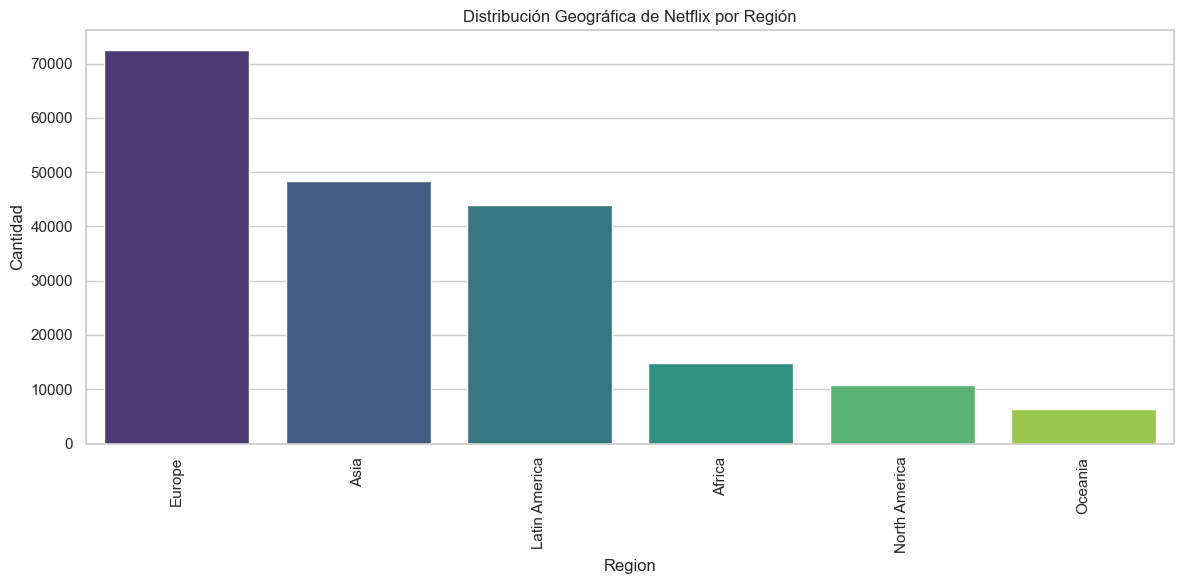

In [13]:
# Gráfico visualizar la distribución geográfica.

#Librería seaborn
sns.set(style="whitegrid")

# Contamos la presencia de Netflix en las diferentes regiones
regiones = Netflix['region'].value_counts()

#Gráfico de barras
plt.figure(figsize=(12, 6))  # Tamaño de la figura
sns.barplot(x=regiones.index, y=regiones.values, palette="viridis")  # Tipo de gráfico y colores
plt.xticks(rotation=90)  # Rotar etiquetas del eje x
plt.xlabel('Region')  # Etiqueta del eje x
plt.ylabel('Cantidad')  # Etiqueta del eje y
plt.title('Distribución Geográfica de Netflix por Región')  # Título del gráfico
plt.tight_layout()  # Ajustar el diseño para evitar cortes en las etiquetas

plt.show()